## Exercici 2
### Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

In [ ]:
import pandas as pd
import numpy as np
movies = pd.read_csv('movies.dat', delimiter='::', engine='python', names=["Code","Name","Genre"]

Per llegir l'arxiu .dat he utilitzat la llibreria pandas. Si es mira al fitxer original es pot veure com cada columna estava delimitada per "::".
El primer error que he trovat ha sigut que al llegir l'arxiu, es creava un dataframe sense noms en les columnes. La millor manera d'assignar-li un nom a cadascuna de les columnes es des de el principi ja que si no es fa així es perd el primer registre que és la película de Toy Story.

In [117]:
movies

,Code,Name,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [118]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Code    3883 non-null   int64 
 1   Name    3883 non-null   object
 2   Genre   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [131]:
movies.isnull().sum()

Code     0
Name     0
Genre    0
Year     0
dtype: int64

In [119]:
movies.shape #3882 registres o files i 3 columnes


(3883, 3)

Ara vull separar l'any i possar-lo en una nova columna.

In [120]:
movies['Year'] = movies['Name'].str.extract(r'\((\d+)\)') 
# De la columna movies s'extrau l'any. Per fer-ho utilizo la funció extract.
# S'extrau un element que comenci per "(" i contingui mes de un número i acabi amb ")". 
movies

,Code,Name,Genre,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [121]:
movies['Name'] = movies['Name'].str.replace(r'\s*\(\d+\)$', '', regex=True) # Elimina l'any
# Regex elimina el patró i el subsitueix per una cadena vuida.
movies

,Code,Name,Genre,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


Per acabar, com s'em demana que cada película només tingui un gènere, només em quedaré amb el primer gènere assignat a cada película. Per fer-ho, primer de tot convertiré el el registre en un array per diferènciar entre gèneres d'una mateixa película.

In [122]:
movies.Genre.unique() 

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [123]:
movies["Genre"]=movies["Genre"].str.split("|") #Ara cada registre és una llista.

In [124]:
movies.head(5)

,Code,Name,Genre,Year
0,1,Toy Story,"[Animation, Children's, Comedy]",1995
1,2,Jumanji,"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [125]:
movies['Genre'] = movies['Genre'].apply(lambda x: x[0])
#Aquesta funció extrau el primer element de la columna Genre.

In [126]:
movies

,Code,Name,Genre,Year
0,1,Toy Story,Animation,1995
1,2,Jumanji,Adventure,1995
2,3,Grumpier Old Men,Comedy,1995
3,4,Waiting to Exhale,Comedy,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [128]:
movies.Genre.unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'Fantasy',
       'Musical'], dtype=object)

Al només quedar-me amb el primer element de la llista, s'han eliminat alguns gèneres del dataframe. Per exemple el gènere Musical ja no apareix al dataframe. Malgrat aquest inconvenient, crec que és la millor manera de fer l'exercici. 


In [144]:
movies.isnull().sum() #Comprovem que no hi hagin valors nulls.

Code     0
Name     0
Genre    0
Year     0
dtype: int64

Ara ja he netejat la base de dades i puc començar a extreure informació.

## Exercici 3
### Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior? Fes una o dues representacions gràfiques i justifica la teva elecció.

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

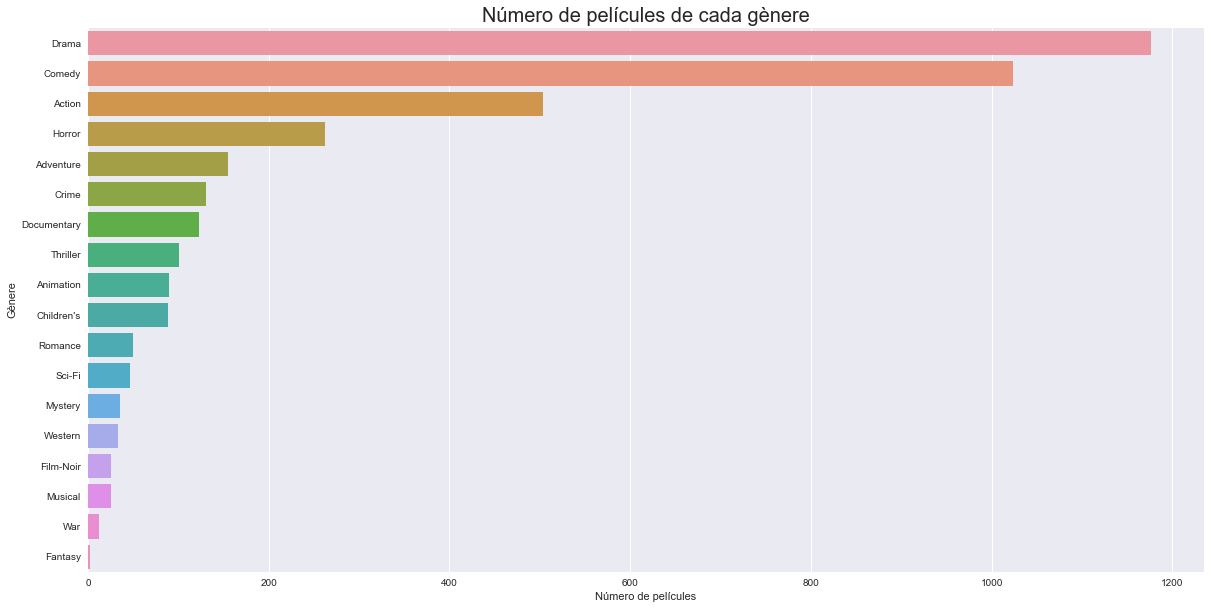

In [203]:
freq_genere=movies["Genre"].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=freq_genere.values, y=freq_genere.index)
plt.title("Número de películes de cada gènere", size=20)
plt.ylabel("Gènere")
plt.xlabel("Número de películes")
plt.show()

Aquest gràfic de barres horitzontal és útil per saber el número de películes registrades d'un mateix gènere. Els més abundants són el drama i la comèdia, mentres que el que menys apareix és el de fantasia. 

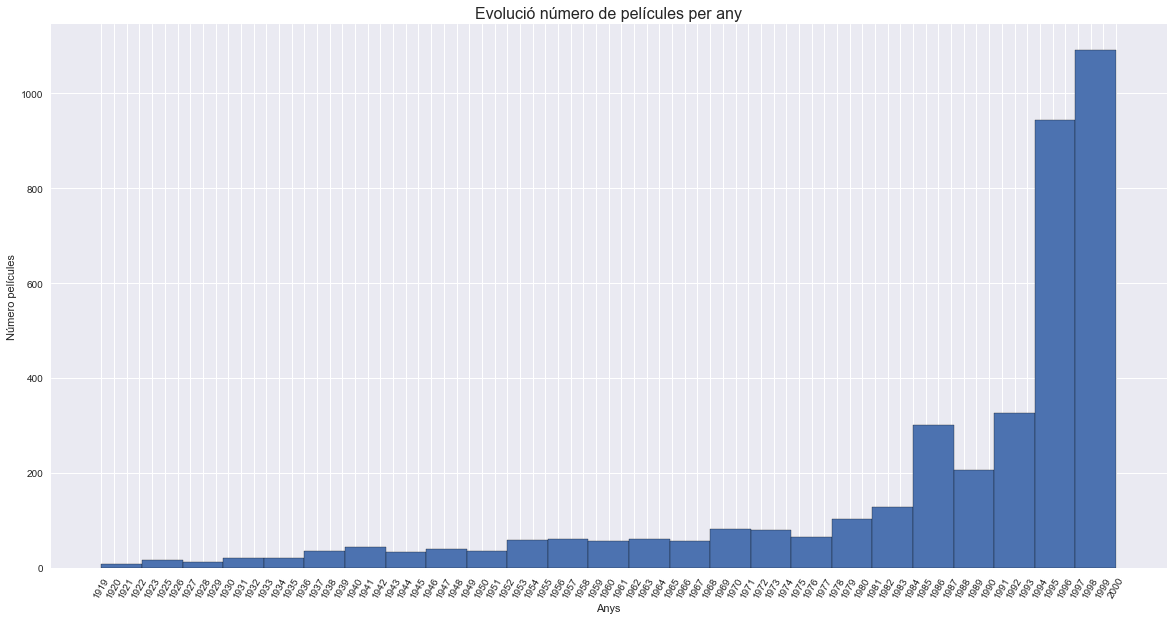

In [196]:
freq_any=movies["Year"].value_counts()
sorted_data = [d for _, d in sorted(zip(freq_any, movies))] 
sorted_years = sorted(movies["Year"]) #Ordena els anys 
plt.figure(figsize=(20,10))
plt.hist(sorted_years, bins=25, edgecolor="black")
plt.xticks(rotation=60)
plt.grid(True)
plt.title("Evolució número de películes per any", size=16)
plt.ylabel("Número películes")
plt.xlabel("Anys")
plt.show()

Per poder observar la evolució durant els anys del número de películes he creat un histograma que agrupa un conjunt d'anys i li assigna un valor de l'eix i que és el número de cops que apareix aquell conjunt d'anys a la base de dades. 
Segons el gràfic el nombre de películes es dispara a partir de l'any 1994. La majoria de películes de la base de dades són de l'any 1994 cap endavant. 